In [1]:
import pandas as pd
import keras
from keras.models import Sequential
from keras.layers import *

C:\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib notebook

In [3]:
training_data_df = pd.read_csv("sales_data_training_scaled.csv")

X = training_data_df.drop('total_earnings', axis=1).values
Y = training_data_df[['total_earnings']].values

#  Custom Metrics

# Regularization

In [4]:
l1_reg = keras.regularizers.l1(l=0.01)
l2_reg = keras.regularizers.l2(l=0.01)

#  Momentum and Learning Rate

In [5]:
# Optimizer Tuning
optimizer = keras.optimizers.SGD(lr=0.001, momentum=0.4)

# Build MLP Model 

In [6]:
# Define the model
RUN_NAME = "run 2 with 5 nodes"
model = Sequential()
model.add(Dense(5, input_dim=9, activation='relu', name='layer_1'))
model.add(Dense(100, activation='relu', name='layer_2', kernel_regularizer=l1_reg))
model.add(Dropout(0.2))
model.add(Dense(50, activation='relu', name='layer_3'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='linear', name='output_layer'))

model.compile(loss='mean_squared_error', optimizer=optimizer, metrics=['mae'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
layer_1 (Dense)              (None, 5)                 50        
_________________________________________________________________
layer_2 (Dense)              (None, 100)               600       
_________________________________________________________________
dropout_1 (Dropout)          (None, 100)               0         
_________________________________________________________________
layer_3 (Dense)              (None, 50)                5050      
_________________________________________________________________
dropout_2 (Dropout)          (None, 50)                0         
_________________________________________________________________
output_layer (Dense)         (None, 1)                 51        
Total params: 5,751
Trainable params: 5,751
Non-trainable params: 0
_________________________________________________________________


In [7]:
model.get_weights()

[array([[ 0.01479733, -0.1932109 , -0.39895985, -0.39175513,  0.17891538],
        [ 0.33730203,  0.45034444,  0.33528185, -0.44709745,  0.5110662 ],
        [ 0.5613476 ,  0.5664395 , -0.41037005, -0.49643657,  0.14123946],
        [ 0.23665261, -0.45675373,  0.36125934, -0.33810052,  0.25107956],
        [-0.2624103 , -0.5830041 ,  0.23524445,  0.60651124, -0.47961754],
        [-0.14212054,  0.5812901 ,  0.12700373,  0.05700397, -0.33082807],
        [ 0.5042068 ,  0.09762013,  0.03884119, -0.33946952,  0.6492163 ],
        [ 0.1603117 , -0.11663556, -0.12958735,  0.06016088,  0.45613337],
        [-0.060862  , -0.5088998 , -0.50910103, -0.07023281, -0.0414837 ]],
       dtype=float32),
 array([0., 0., 0., 0., 0.], dtype=float32),
 array([[ 5.07813841e-02, -9.95610207e-02, -3.88402343e-02,
          1.15697101e-01,  1.43921986e-01,  1.47584692e-01,
          8.93796235e-02, -1.54746205e-01, -2.26214901e-01,
          1.13755003e-01,  7.42810816e-02, -2.34495699e-01,
         -2.1615

#  Callbacks

##  CSV Logger

In [8]:
# Create a CSV logger
csv_logger = keras.callbacks.CSVLogger('logs/training_logs.csv', separator=',', append=False)

##  Early Stopping Callback

In [9]:
# Create EarlyStopping callback
early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss',min_delta=0.001, patience=5)

#  Model Trainning

In [10]:
# Train the model
history = model.fit(
    X,
    Y,
    validation_split=0.2,
    batch_size = 10,
    epochs=10,
    shuffle=True,
    verbose=1,
    callbacks=[csv_logger,early_stopping]
)

Train on 800 samples, validate on 200 samples
Epoch 1/10
800/800 [==============================] - 2s 3ms/step - loss: 0.6837 - mean_absolute_error: 0.2034 - val_loss: 0.6505 - val_mean_absolute_error: 0.1465
Epoch 2/10
800/800 [==============================] - 1s 1ms/step - loss: 0.6510 - mean_absolute_error: 0.1511 - val_loss: 0.6342 - val_mean_absolute_error: 0.1253
Epoch 3/10
800/800 [==============================] - 1s 934us/step - loss: 0.6404 - mean_absolute_error: 0.1467 - val_loss: 0.6258 - val_mean_absolute_error: 0.1225
Epoch 4/10
800/800 [==============================] - 1s 932us/step - loss: 0.6289 - mean_absolute_error: 0.1362 - val_loss: 0.6186 - val_mean_absolute_error: 0.1222
Epoch 5/10
800/800 [==============================] - 1s 1ms/step - loss: 0.6225 - mean_absolute_error: 0.1384 - val_loss: 0.6118 - val_mean_absolute_error: 0.1225
Epoch 6/10
800/800 [==============================] - ETA: 0s - loss: 0.6146 - mean_absolute_error: 0.133 - 1s 828us/step - loss: 

#  Saving Model

In [ ]:
model.save('models/sales_model_best_model.h5')
print('!!!model has been Saved!!!')

#  Deleting Model

In [ ]:
del model
print('!!!model has been deleted!!!')

#  Loading Model

In [ ]:
# Model Load
# load the weights that yielded the best validation accuracy
model = keras.models.load_model('models/sales_model_best_model.h5')
print('!!!model has been Loaded!!!')

#  Model Evaluation

In [ ]:
# Load the separate test data set
test_data_df = pd.read_csv("sales_data_test_scaled.csv")
X_test = test_data_df.drop('total_earnings', axis=1).values
Y_test = test_data_df[['total_earnings']].values
test_error_rate = model.evaluate(X_test, Y_test, verbose=0)
print("The mean squared error (MSE) for the test data set is: {}".format(test_error_rate))
#---------

#  Visualization

In [11]:
history.history.keys()

dict_keys(['val_loss', 'val_mean_absolute_error', 'loss', 'mean_absolute_error'])

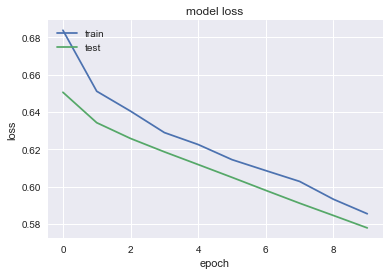

In [12]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()